<a href="https://colab.research.google.com/github/rocketman2013/HorseModel/blob/main/HorseModelGitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

##Creating Dataset
- Note about track conditions:
  - ```{0 : sloppy, 1 : muddy, 2 : good, 3 : fast}```

- Note about Racing Style
  - ```{0: NA, 1 : closer, 2 : presser, 3 : early_presser, 4 : speed}```


In [2]:
Jockey = [0.06,0.06,0.05,0.05,0.17,0.12,0.17,0.15,0.13,0.13,0.13,0.08,0.08,0.08,0.08,0.08,0.08, 0.22, 0.22, 0.07, 0.16, 0.18, 0.19, 0.2, 0.16, 0.16, 0.15, 0.15, 0.15, 0.2, 0.19, 0.06]
Trainer = [0.15,0.12,0.09,0.05,0.14,0.16,0.16,0.16,0.12,0.12,0.12,0.08,0.08,0.13,0.13,0.13,0.13, 0.18, 0.18, 0.09, 0.14, 0.03, 0.14, 0.14, 0.2, 0.02, 0.08, 0.08, 0.08, 0.15, 0.16, 0.08]
Odds = [27.42,23.91,3.9,3.8,12.91,2.45,0.6,14.4,2.1,3.1,9.7,44.59,11.5,5.99,8.82,5.39,12.45, 1.10, 4.7, 38, 9.36, 36.89, 3.7, 2, 5.9, 18.72, 5.7, 2.1, 5.8, 5.16, 21.37, 7.5]
Distance = [1, 0.875, 1.04, 1, 0.75, 0.937, 1, 1.0625, 1, 1, 1, 1.25, 1.0625,0.8125,0.8125,1,0.8125, 0.75, 0.625, 0.625, 0.75, 0.8125, 1, 1, 1, 0.75, 1.0625, 1.04, 1.0625, 1, 1, 1]
Conditions = [3, 3, 3, 3, 3, 1, 0, 0, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3]
Style = [3, 3, 3, 3, 2, 2, 3, 3, 4, 4, 4, 1, 1, 3, 3, 3, 3, 1, 1, 0, 3, 4, 4, 4, 4, 4, 1, 1, 1, 3, 2, 1]
Time = [98.8,89.8,104.8,100.15,86.7,93.2,98.4,106.15,98.65,99.15,98.8,132.6,103.1,80.4,78.1,101.3,77, 75.8, 59.4, 62, 74, 81, 104, 102.3, 100.2, 78.2, 106.45, 104.85, 105.85, 100.55, 99.2, 101.2]
TimeBack = [2, 0, 0, 1.35, 1.45, 2.2, 0, 0.15, 0.45, 0.15, 0, 1.4, 0.9, 2.4, 0.5, 0.5, 0, 1.2, 0.08, 2.4, 1.2, 2.4, 2, 1.1, 0, 4.5, 1.45, 1.25, 0.25, 1.35, 0, 0, ]

In [3]:
# Making a Pandas DataFrame
labels = pd.DataFrame({
    'Jockey': Jockey,
    'Trainer': Trainer,
    'Odds': Odds,
    'Distance': Distance,
    'Conditions': Conditions,
    'Style': Style,
    'Time': Time,
    'Time_Behind': TimeBack
})

labels

,Jockey,Trainer,Odds,Distance,Conditions,Style,Time,Time_Behind
0,0.06,0.15,27.42,1.0000,3,3,98.80,2.00
1,0.06,0.12,23.91,0.8750,3,3,89.80,0.00
2,0.05,0.09,3.90,1.0400,3,3,104.80,0.00
3,0.05,0.05,3.80,1.0000,3,3,100.15,1.35
4,0.17,0.14,12.91,0.7500,3,2,86.70,1.45
5,0.12,0.16,2.45,0.9370,1,2,93.20,2.20
6,0.17,0.16,0.60,1.0000,0,3,98.40,0.00
7,0.15,0.16,14.40,1.0625,0,3,106.15,0.15
8,0.13,0.12,2.10,1.0000,2,4,98.65,0.45
9,0.13,0.12,3.10,1.0000,3,4,99.15,0.15


Creating two different Datasets and DataLoaders based on if you are predicting horse time or the time back from the winner

In [4]:
# Creating a Dataset to Predict a Horse's Time
class HorseDataTime(Dataset):
    def __init__(self, annotations):
        self.data_labels = annotations

    def __len__(self):
        return len(self.data_labels)

    def __getitem__(self, idx):
        jockey_value = self.data_labels.iloc[idx,0]
        trainer_value = self.data_labels.iloc[idx,1]
        odds_value = self.data_labels.iloc[idx,2]
        distance_value = self.data_labels.iloc[idx,3]
        conditions_value = self.data_labels.iloc[idx,4]
        style_value = self.data_labels.iloc[idx,5]
        label = torch.tensor(self.data_labels.iloc[idx,6], dtype = torch.float32)

        data_values = torch.tensor([jockey_value, trainer_value, odds_value, distance_value, conditions_value, style_value], dtype = torch.float32)

        return data_values, label

In [5]:
# Creating Dataset to Predict a Horse's finishing time in seconds behind the winner
class HorseDataTimeBack(Dataset):
    def __init__(self, annotations):
        self.data_labels = annotations

    def __len__(self):
        return len(self.data_labels)

    def __getitem__(self, idx):
        jockey_value = self.data_labels.iloc[idx,0]
        trainer_value = self.data_labels.iloc[idx,1]
        odds_value = self.data_labels.iloc[idx,2]
        distance_value = self.data_labels.iloc[idx,3]
        conditions_value = self.data_labels.iloc[idx,4]
        style_value = self.data_labels.iloc[idx,5]
        label = torch.tensor(self.data_labels.iloc[idx,7], dtype = torch.float32)

        data_values = torch.tensor([jockey_value, trainer_value, odds_value, distance_value, conditions_value, style_value], dtype = torch.float32)

        return data_values, label

In [33]:
train_ds_time = HorseDataTime(
    annotations = labels)

dataloader_time = DataLoader(
    train_ds_time,
    batch_size=5,
    shuffle=True
)

train_ds_timeback = HorseDataTimeBack(
    annotations = labels
)

dataloader_timeback = DataLoader(
    train_ds_timeback,
    batch_size=5,
    shuffle=True
)

In [20]:
# Viewing an batch of the data
X, y = next(iter(dataloader_timeback))
print(X)
print(X.shape)
print(y)
print(y.shape)

tensor([[ 0.1500,  0.0800,  2.1000,  1.0400,  3.0000,  1.0000],
        [ 0.1500,  0.1600, 14.4000,  1.0625,  0.0000,  3.0000]])
torch.Size([2, 6])
tensor([1.2500, 0.1500])
torch.Size([2])


## Creating Model

### Linear Model

In [22]:
'''Model makes prediction for one horse at a time, does not take into account
the racing field as a whole'''

class HorseModel0(nn.Module):
  def __init__(self,
               hidden_features : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=6,
                  out_features = hidden_features),
        nn.Linear(in_features = hidden_features,
                  out_features = hidden_features),
        nn.Linear(in_features = hidden_features,
                  out_features = 1)
    )
  def forward(self, x):
    x = x.squeeze()
    return self.layer_stack(x)

In [34]:
model_linear = HorseModel0(hidden_features = 10)

### Non Linear Model

In [10]:
class HorseModel1(nn.Module):
  def __init__(self,
               hidden_features : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=6,
                  out_features = hidden_features),

        nn.Linear(in_features = hidden_features,
                  out_features = hidden_features),

        nn.Hardtanh(),

        nn.Linear(in_features = hidden_features,
                  out_features = 1)
    )
  def forward(self, x):
    x = x.squeeze()
    return self.layer_stack(x)

In [35]:
model_nonlin = HorseModel1(hidden_features = 10)

### Training Loop

In [12]:
# Create Loss Function
loss_fn = nn.MSELoss()

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished Training Trainset


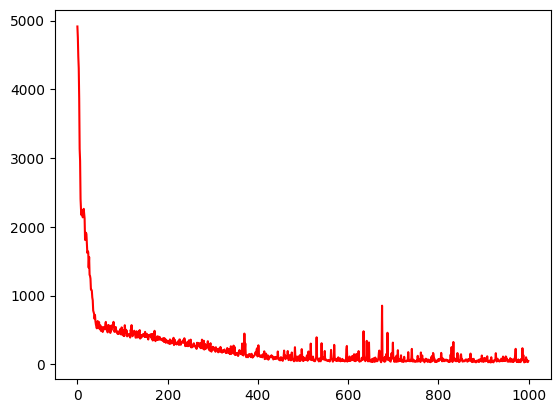

In [36]:
# TRAINING THE LINEAR MODEL
epochs = 1000;

# Optimizer for linear model
optimizer_linear = torch.optim.SGD(params=model_linear.parameters(),
                            lr = 0.00001)

loss_values = []

for epoch in tqdm(range(epochs)):
  model_linear.train()
  running_loss = 0.0

  for batch, (X, y) in enumerate(dataloader_time):

    y_pred = model_linear(X).squeeze()

    loss = loss_fn(y_pred, y[:])

    # if epoch % 50 == 0:
    #   print(f"Epoch: {epoch} Loss: {loss}")

    optimizer_linear.zero_grad()

    loss.backward()

    optimizer_linear.step()

    running_loss += loss.item()

  loss_values.append(running_loss/(batch*2))

print('Finished Training Trainset')

plt.plot(np.array(loss_values), 'r')

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished Training Trainset


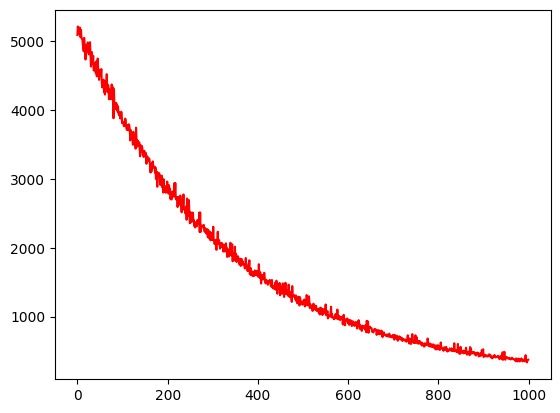

In [37]:
# TRAINING THE NON-LINEAR MODEL
epochs = 1000;

# Optimizer for non-linear model
optimizer_nonlin = torch.optim.SGD(params=model_nonlin.parameters(),
                            lr = 0.00001)

loss_values = []

for epoch in tqdm(range(epochs)):
  model_nonlin.train()
  running_loss = 0.0

  for batch, (X, y) in enumerate(dataloader_time):

    y_pred = model_nonlin(X).squeeze()

    loss = loss_fn(y_pred, y)

    # if epoch % 50 == 0:
    #   print(f"Epoch: {epoch} Loss: {loss}")

    optimizer_nonlin.zero_grad()

    loss.backward()

    optimizer_nonlin.step()

    running_loss += loss.item()

  loss_values.append(running_loss/(batch*2))

print('Finished Training Trainset')

plt.plot(np.array(loss_values), 'r')

## Model Evaluation on Real Race Data

Inputing Data on horses before the race starts

In [39]:
# Scratches: 9, 12, 13
scratches = [9,12,13]
indexadd = 1

race_9_day_2_data = [torch.tensor([0.08, 0.14, 4, 1, 0, 2]),
               torch.tensor([0.05, 0.05, 33, 1, 0, 2]),
               torch.tensor([0.20, 0.14, 2.5, 1, 0, 1]),
               torch.tensor([0.09, 0.07, 20, 1, 0, 0]),
               torch.tensor([0.14, 0.15, 5, 1, 0, 1]),
               torch.tensor([0.06, 0.07, 16, 1, 0, 2]),
               torch.tensor([0.03, 0.13, 12, 1, 0, 3]),
               torch.tensor([0.13, 0.15, 3.5, 1, 0, 0]),
               torch.tensor([0.15, 0.18, 5, 1, 0, 1]),
               torch.tensor([0.05, 0.06, 19, 1, 0, 3])]

for epoch in range (len(race_9_day_2_data)):
  model_nonlin.eval()
  with torch.inference_mode():
    pred = model_nonlin(race_9_day_2_data[epoch])

    if (epoch + 1) in scratches:
      indexadd += 1
    print(f"Horse: {epoch + indexadd}, Pred Time: {pred}")

Horse: 1, Pred Time: tensor([73.7374])
Horse: 2, Pred Time: tensor([73.7374])
Horse: 3, Pred Time: tensor([73.7374])
Horse: 4, Pred Time: tensor([73.7374])
Horse: 5, Pred Time: tensor([73.7374])
Horse: 6, Pred Time: tensor([73.7374])
Horse: 7, Pred Time: tensor([73.7374])
Horse: 8, Pred Time: tensor([73.6024])
Horse: 10, Pred Time: tensor([73.7374])
Horse: 11, Pred Time: tensor([73.7374])


```
Horse: 1, Pred Time: tensor([95.8145])
Horse: 2, Pred Time: tensor([105.5158])
Horse: 3, Pred Time: tensor([95.7724])
Horse: 4, Pred Time: tensor([101.2819])
Horse: 5, Pred Time: tensor([96.3763])
Horse: 6, Pred Time: tensor([99.8197])
Horse: 7, Pred Time: tensor([98.3207])
Horse: 8, Pred Time: tensor([95.8329])
Horse: 9, Scratch
Horse: 10, Pred Time: tensor([96.3965])
Horse: 11, Pred Time: tensor([100.7971])
```

Prediction Ranks:
1. Horse 3
2. Horse 1
3. Horse 8
4. Horse 5
5. Horse 10
6. Horse 7
7. Horse 6
8. Horse 11
9. Horse 4
10. Horse 2


Reality:
1. Horse 1
2. Horse 3
3. Horse 7

In [40]:
race_8_day_2_data = [torch.tensor([0.16, 0.18, 3.5, 1.25, 0, 2]),
               torch.tensor([0.12, 0.12, 12, 1.25, 0, 1]),
               torch.tensor([0.15, 0.11, 10, 1.25, 0, 1]),
               torch.tensor([0.14, 0.16, 6, 1.25, 0, 2]),
               torch.tensor([0.14, 0.10, 28, 1.25, 0, 3]),
               torch.tensor([0.16, 0.09, 17, 1.25, 0, 3]),
               torch.tensor([0.13, 0.18, 3, 1.25, 0, 3]),
               torch.tensor([0.13, 0.11, 5, 1.25, 0, 1]),
               torch.tensor([0.10, 0.16, 13, 1.25, 0, 0]),
               torch.tensor([0.17, 0.16, 5, 1.25, 0, 1])]

for epoch in range (len(race_8_day_2_data)):
  model_nonlin.eval()
  with torch.inference_mode():
    pred = model_nonlin(race_8_day_2_data[epoch])
    print(f"Horse: {epoch + 1}, Pred Time: {pred}")

Horse: 1, Pred Time: tensor([73.7374])
Horse: 2, Pred Time: tensor([73.7374])
Horse: 3, Pred Time: tensor([73.7374])
Horse: 4, Pred Time: tensor([73.7374])
Horse: 5, Pred Time: tensor([73.7374])
Horse: 6, Pred Time: tensor([73.7374])
Horse: 7, Pred Time: tensor([73.7374])
Horse: 8, Pred Time: tensor([73.7374])
Horse: 9, Pred Time: tensor([73.7374])
Horse: 10, Pred Time: tensor([73.7374])


```
Horse: 1, Pred Time: tensor([109.9447])
Horse: 2, Pred Time: tensor([112.8697])
Horse: 3, Scratch
Horse: 4, Pred Time: tensor([112.2737])
Horse: 5, Pred Time: tensor([110.7746])
Horse: 6, Pred Time: tensor([118.6913])
Horse: 7, Pred Time: tensor([114.8316])
Horse: 8, Pred Time: tensor([109.6503])
Horse: 9, Pred Time: tensor([110.4050])
Horse: 10, Pred Time: tensor([113.1295])
Horse: 11, Scratch
Horse: 12, Pred Time: tensor([110.5316])
Horse: 13, Scratch
Horse: 14, Scratch
```

Race 8 Day 2

Predictions:
1. Horse 8
2. Horse 1
3. Horse 9
4. Horse 12
5. Horse 5
6. Horse 4
7. Horse 2
8. Horse 10
9. Horse 7
10. Horse 6

Reality:
1. Horse 9
2. Horse 5
3. Horse 7
4. Horse 1

Predicitons from the time-back trained model

Time Back Preds:
```
Horse: 1, Pred Time: tensor([1.0574])
Horse: 2, Pred Time: tensor([1.1655])
Horse: 3, Pred Time: tensor([1.1235])
Horse: 4, Pred Time: tensor([1.1250])
Horse: 6, Pred Time: tensor([0.9361])
Horse: 7, Pred Time: tensor([0.8144])
Horse: 8, Pred Time: tensor([1.0920])
Horse: 9, Pred Time: tensor([1.0949])
Horse: 10, Pred Time: tensor([1.0595])
```
Reality:

1. Horse 6
2. Horse 4
3. Horse 7
4. Horse 10

Race 8 Preds:
```
Horse: 2, Pred Time: tensor([0.2969])*
Horse: 3, Pred Time: tensor([0.9599])****
Horse: 4, Pred Time: tensor([1.1231])
Horse: 5, Pred Time: tensor([0.9070])***
Horse: 6, Pred Time: tensor([0.6982])**
Horse: 7, Pred Time: tensor([1.1232])
Horse: 8, Pred Time: tensor([1.1230])
Horse: 9, Pred Time: tensor([1.1230])
Horse: 11, Pred Time: tensor([0.9606])****
```

Race 9 Preds
```
Horse: 2, Pred Time: tensor([1.1023])
Horse: 3, Pred Time: tensor([0.8106])
Horse: 4, Pred Time: tensor([1.1230])
Horse: 5, Pred Time: tensor([1.1225])
Horse: 6, Pred Time: tensor([1.0672])
Horse: 8, Pred Time: tensor([0.2590])
Horse: 9, Pred Time: tensor([0.9146])
Horse: 10, Pred Time: tensor([1.1230])
Horse: 11, Pred Time: tensor([1.1230])
Horse: 13, Pred Time: tensor([0.9689])
Horse: 14, Pred Time: tensor([1.1224])
```
1. Horse 8
2. Horse 3
3. Horse 9
4. Horse 13

Reality:
1. Horse 14
2. Horse 8
3. Horse 2
4. Horse 3